In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2007.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2007,17106,204,14,3547
1,2007,17447,153,42,3542
2,2007,17879,402,38,3526
3,2007,17077,314,14,3552
4,2007,17708,196,25,3535
...,...,...,...,...,...
1874,2007,17384,324,18,3546
1875,2007,17323,392,40,3556
1876,2007,17742,431,30,3514
1877,2007,17165,183,22,3535


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1879, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1879 non-null   int64
 1   Maximum length (m))  1879 non-null   int64
 2   Recession(m),        1879 non-null   int64
 3   Rate/yr(m)           1879 non-null   int64
 4   Snout altitude (m)   1879 non-null   int64
dtypes: int64(5)
memory usage: 73.5 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1879


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2007,17106,204,14,3547
1,2007,17447,153,42,3542
2,2007,17879,402,38,3526
3,2007,17077,314,14,3552
4,2007,17708,196,25,3535


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0260,0.0433,-0.0103
"Recession(m),",NaN,0.0260,1.0000,-0.0133,-0.0096
Rate/yr(m),NaN,0.0433,-0.0133,1.0000,0.0319
Snout altitude (m),NaN,-0.0103,-0.0096,0.0319,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0433
Recession(m),          0.0260
Snout altitude (m)    -0.0103
Year                      NaN
Name: Maximum length (m)), dtype: float64

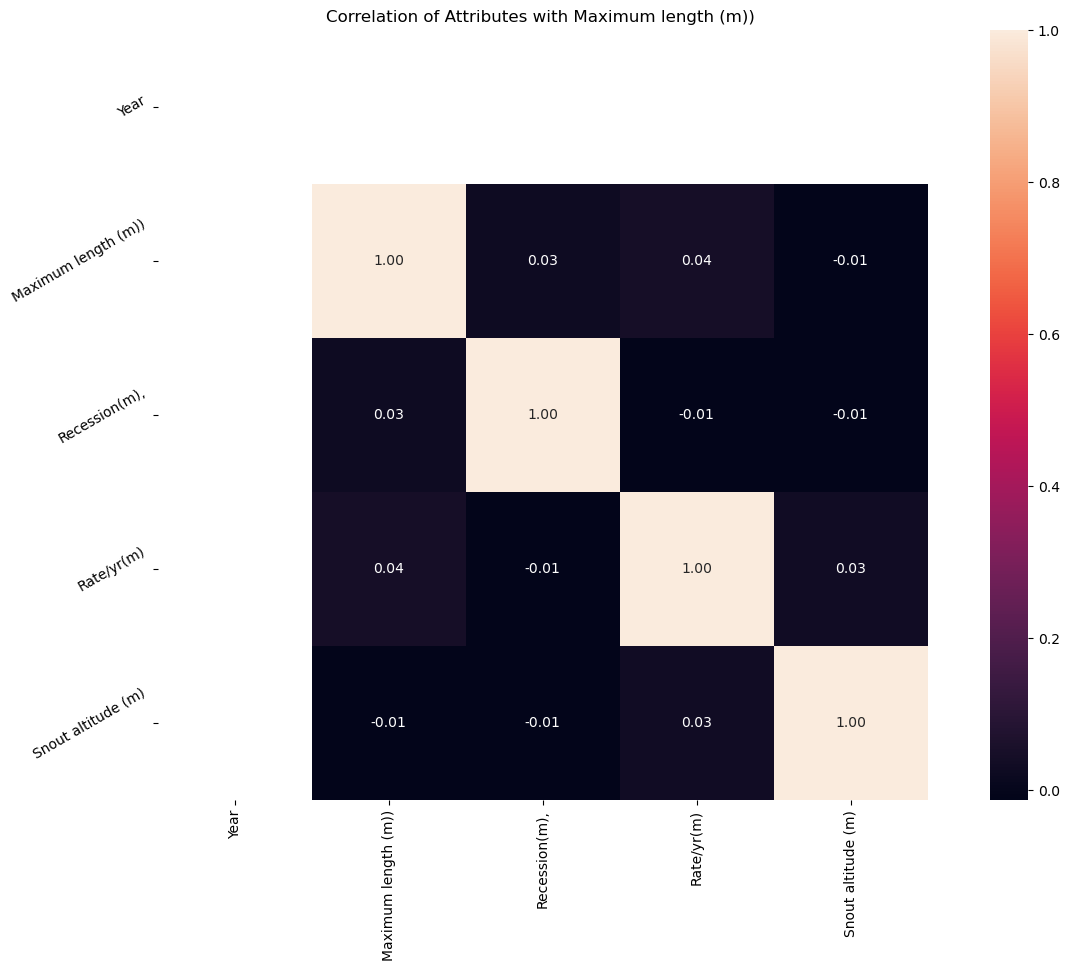

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,879.0000","1,879.0000","1,879.0000","1,879.0000","1,879.0000"
mean,"2,007.0000","17,547.3044",217.4763,27.5897,"3,531.8696"
std,0.0000,299.6256,127.2324,8.5960,20.3732
min,"2,007.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,007.0000","17,295.5000",110.0000,20.0000,"3,514.0000"
50%,"2,007.0000","17,536.0000",211.0000,27.0000,"3,532.0000"
75%,"2,007.0000","17,796.0000",328.5000,35.0000,"3,549.0000"
max,"2,007.0000","18,066.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2007   1.0000
Name: Year, dtype: float64

219   0.0059
301   0.0053
32    0.0053
157   0.0048
218   0.0048
       ...  
118   0.0005
171   0.0005
99    0.0005
72    0.0005
431   0.0005
Name: Recession(m),, Length: 437, dtype: float64

42   0.0389
32   0.0389
22   0.0383
37   0.0383
36   0.0378
18   0.0373
34   0.0373
25   0.0367
23   0.0367
29   0.0351
24   0.0351
20   0.0351
21   0.0346
33   0.0335
27   0.0330
14   0.0325
19   0.0325
41   0.0314
39   0.0314
15   0.0314
17   0.0314
26   0.0309
38   0.0309
30   0.0309
13   0.0298
40   0.0293
35   0.0282
16   0.0282
31   0.0282
28   0.0266
Name: Rate/yr(m), dtype: float64

3523   0.0229
3537   0.0197
3542   0.0197
3552   0.0186
3556   0.0186
        ...  
3531   0.0101
3563   0.0096
3515   0.0096
3566   0.0085
3496   0.0011
Name: Snout altitude (m), Length: 72, dtype: float64



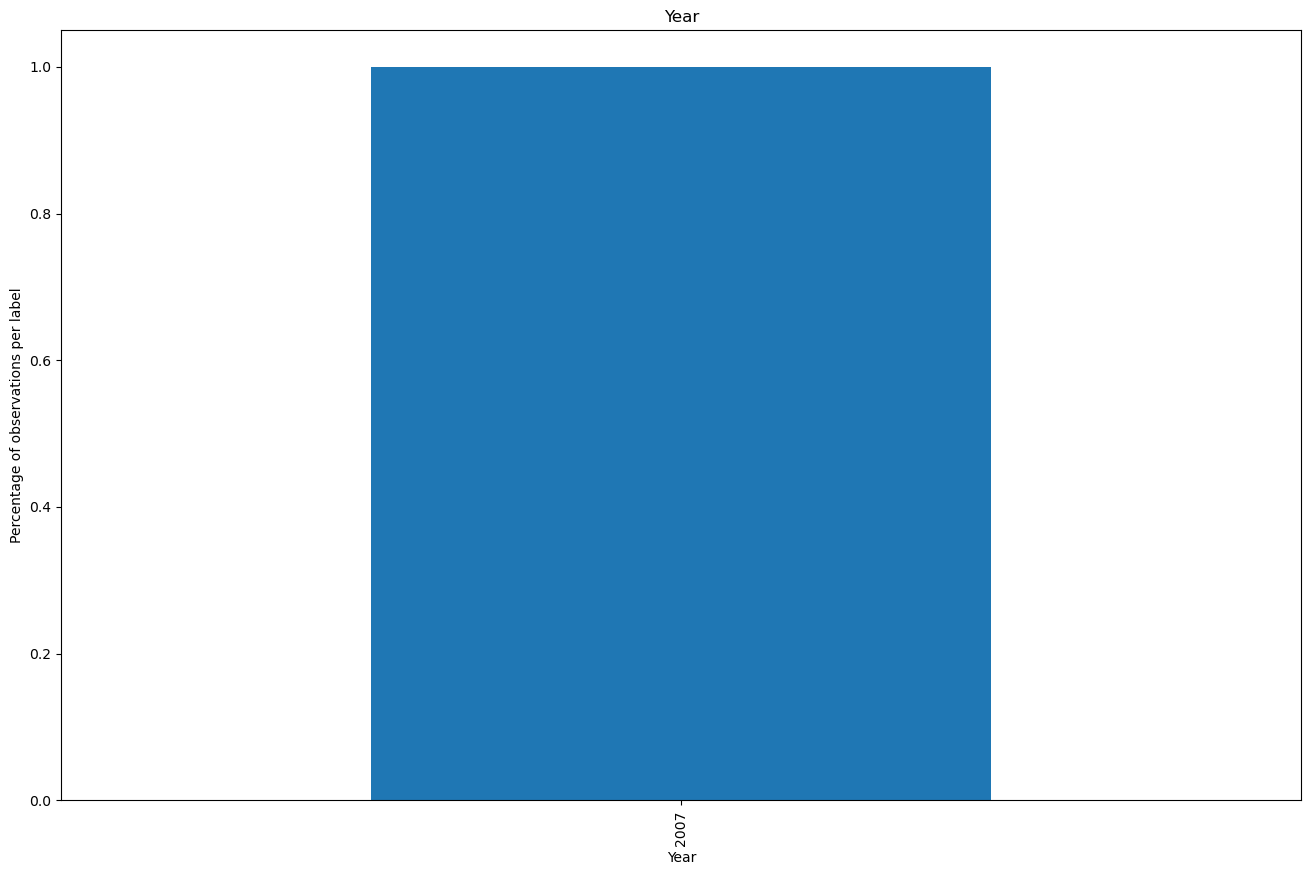

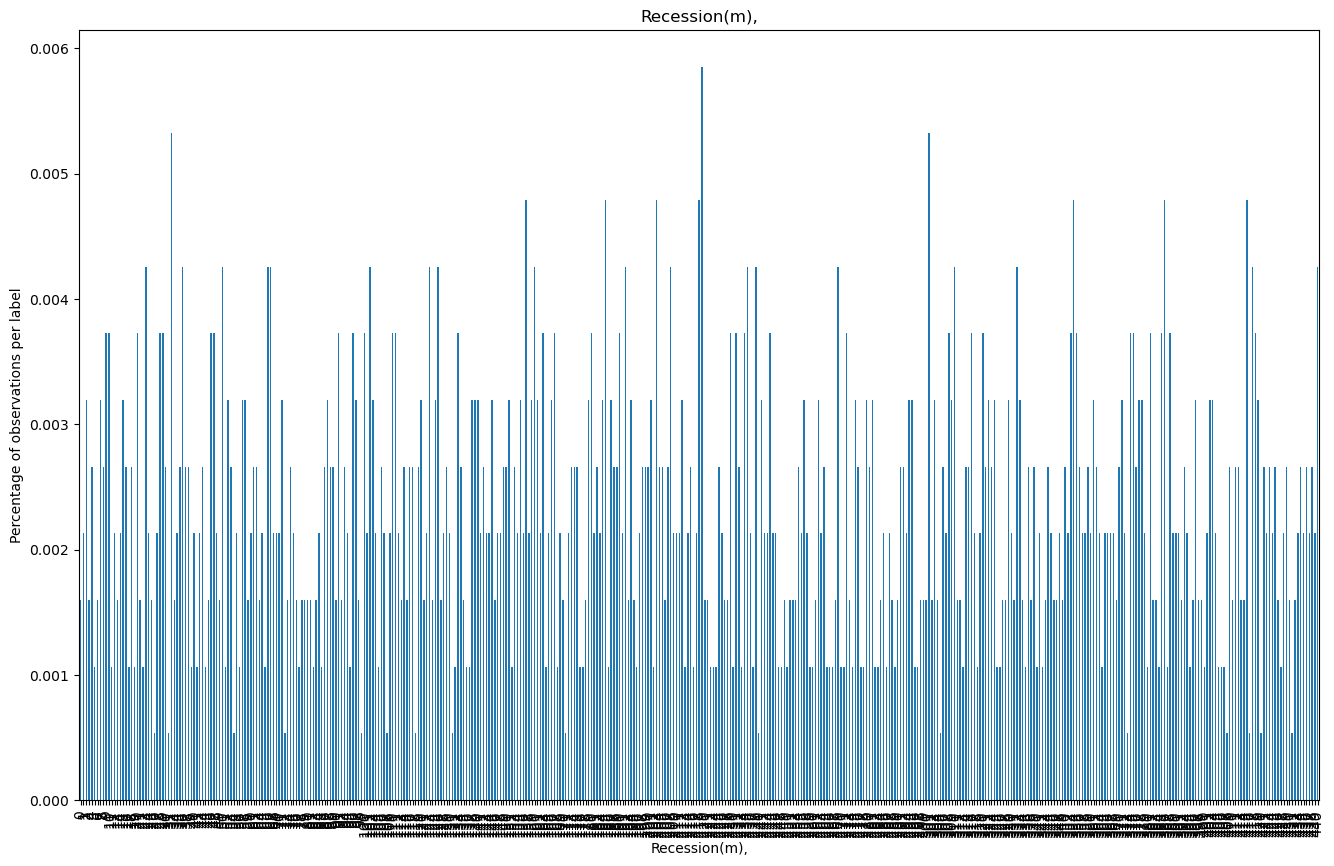

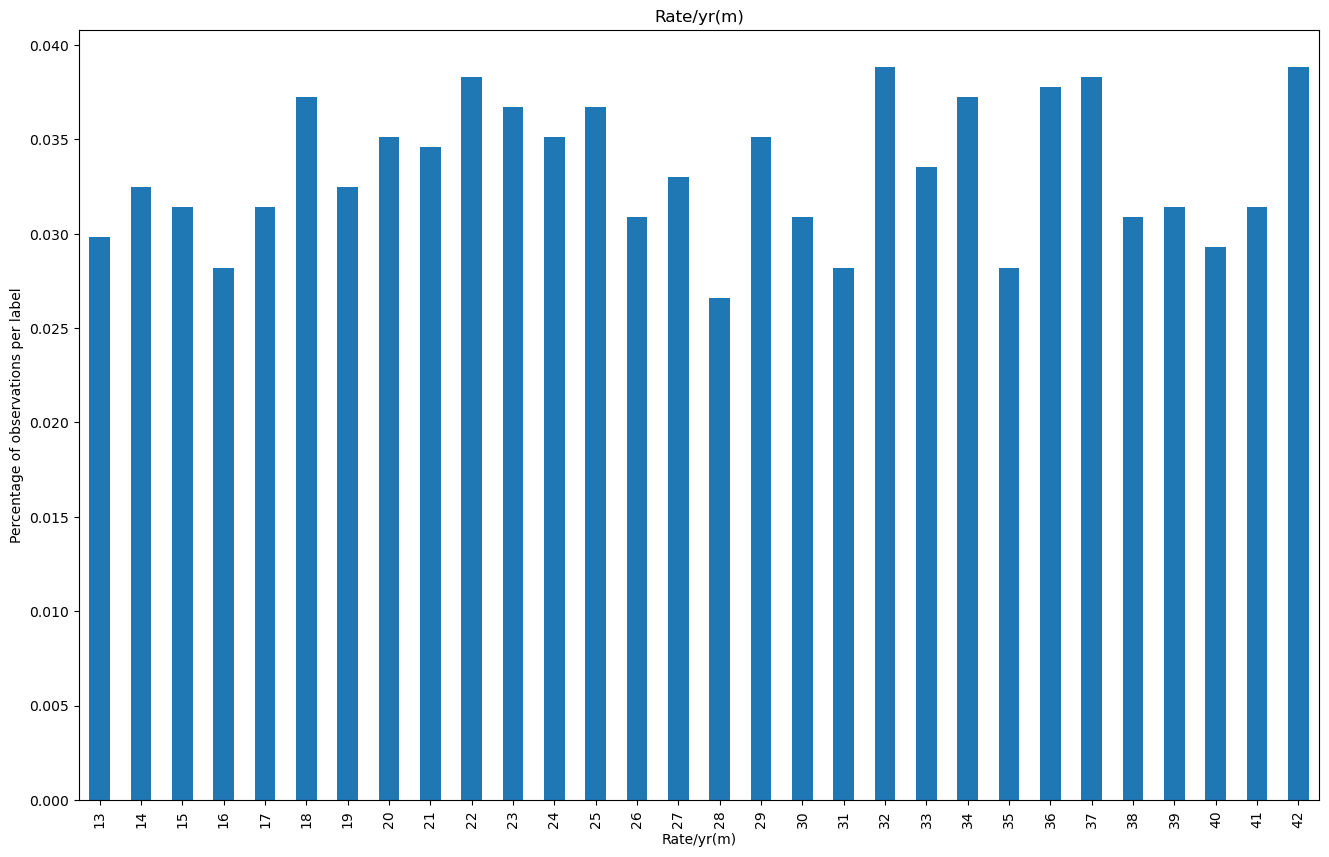

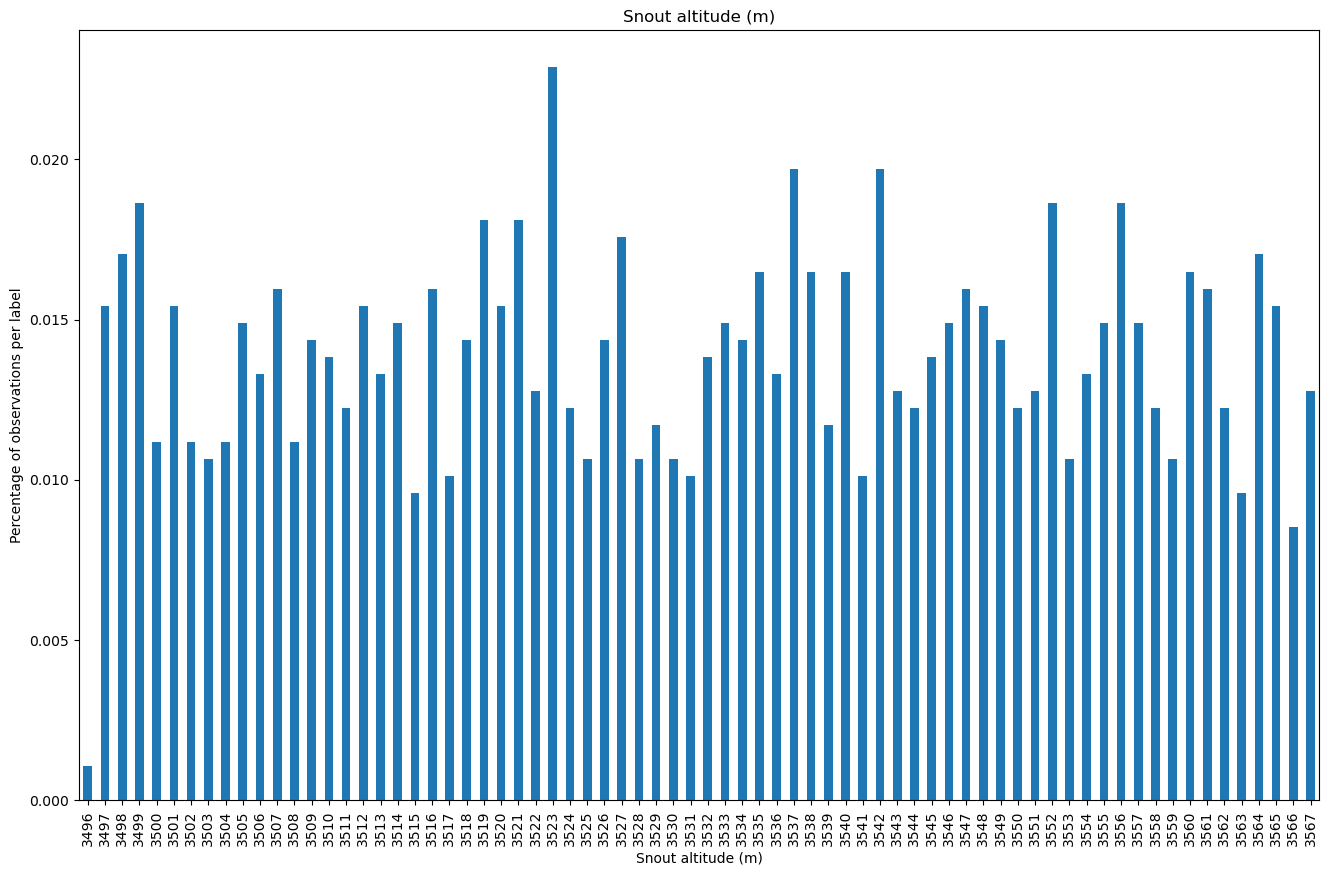

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()